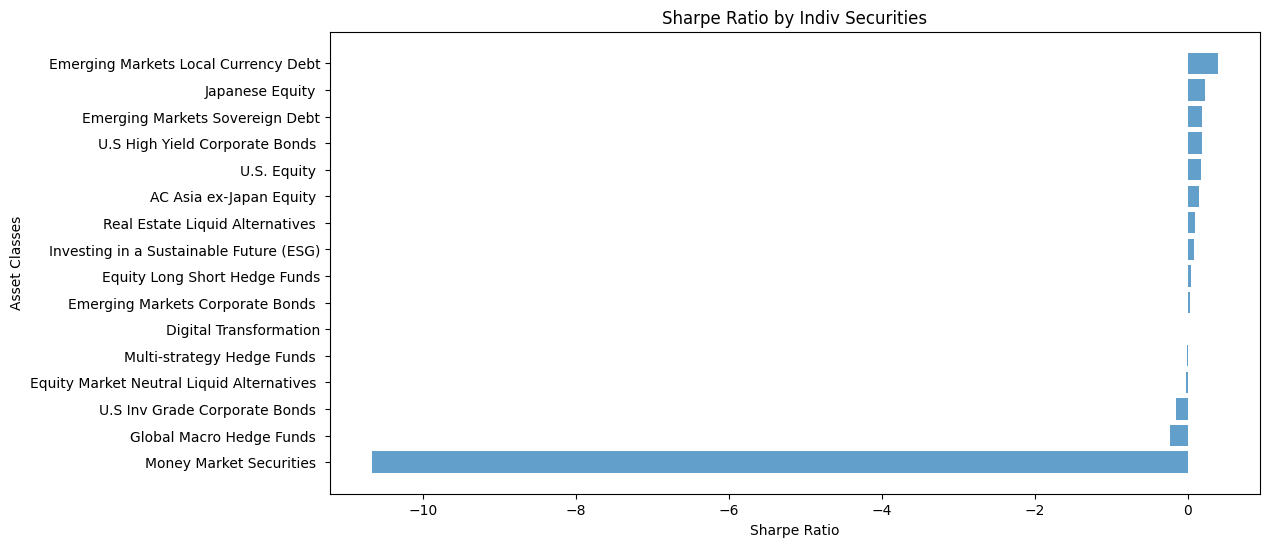

Fixed Income 0.032
Equities 0.0561
Fixed Income 0.057
Fixed Income 0.0846
Equities 0.042
Equities 0.008
Alternatives 0.0655
Thematics 0.0886
Alternatives 0.07
Fixed Income 0.0394
Thematics 0.0465
Alternatives 0.0294
Alternatives 0.0556
Fixed Income 0.0373
Alternatives 0.042
Fixed Income 0.0562
----


In [228]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("APPENDIX DATA.xlsx", sheet_name="ReturnData")

risk_free_rate =0.04
df['Sharpe Ratio'] = (df['Expected Return'] - risk_free_rate) / df['Expected Volatility']
df = df.sort_values(by='Sharpe Ratio', ascending=False)
plt.figure(figsize=(12, 6))
plt.barh(df['Security'], df['Sharpe Ratio'], alpha=0.7)
plt.xlabel('Sharpe Ratio')
plt.ylabel('Asset Classes')
plt.title('Sharpe Ratio by Indiv Securities')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest Sharpe Ratio at the top
plt.show()

for i, asset in enumerate(df["Asset Classes"]):
    print(asset, df["Expected Return"][i])
print("----")


{'whiskers': [<matplotlib.lines.Line2D at 0x126f3f710>,
 'caps': [<matplotlib.lines.Line2D at 0x126e64f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x126e43750>],
 'medians': [<matplotlib.lines.Line2D at 0x126e65290>],
 'fliers': [<matplotlib.lines.Line2D at 0x126e67590>],
 'means': []}

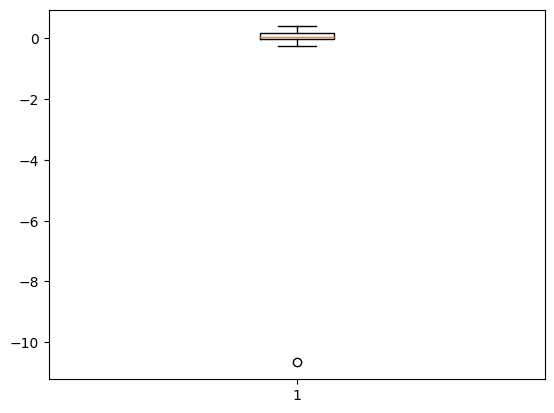

In [229]:
plt.boxplot(df["Sharpe Ratio"])

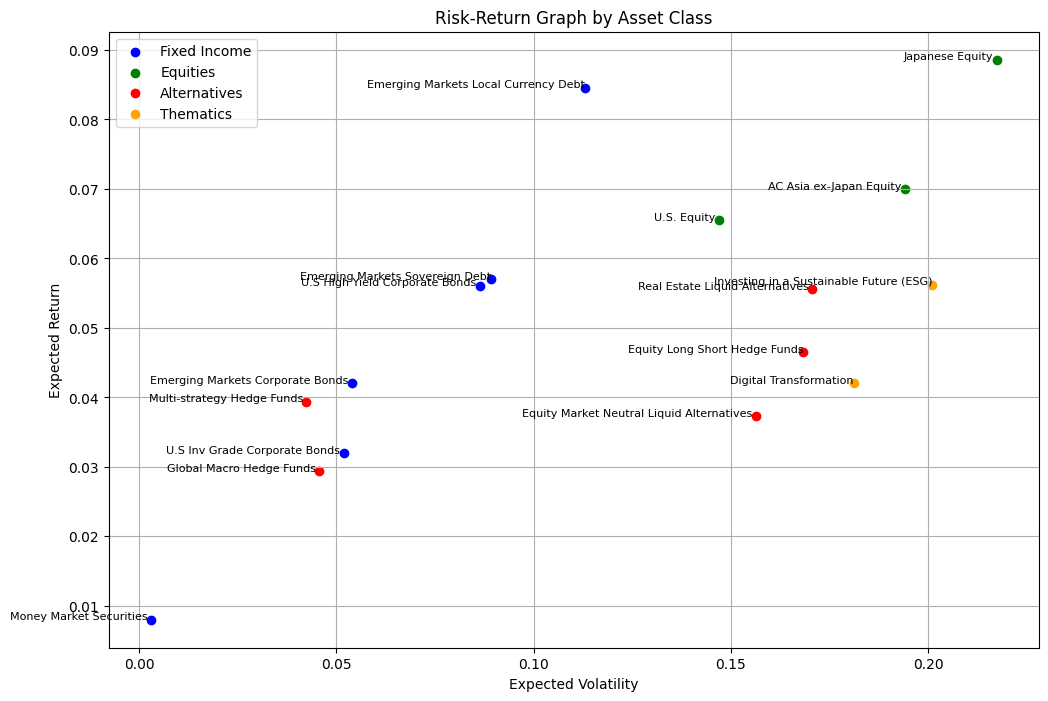

In [230]:
from sklearn.cluster import KMeans

# Create a color map for asset classes
colors = {
    "Fixed Income": "blue",
    "Equities": "green",
    "Alternatives": "red",
    "Thematics": "orange"
}

# Create a scatter plot for risk-return graph
plt.figure(figsize=(12, 8))
for asset_class, color in colors.items():
    asset_class_data = df[df["Asset Classes"] == asset_class]
    plt.scatter(
        asset_class_data["Expected Volatility"],
        asset_class_data["Expected Return"],
        label=asset_class,
        color=color,
        marker="o",
    )

# Add labels to data points (individual securities)
for i, asset in df.iterrows():
    plt.annotate(asset["Security"], (asset["Expected Volatility"], asset["Expected Return"]), fontsize=8, ha="right")

plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")
plt.title("Risk-Return Graph by Asset Class")
plt.legend()
plt.grid(True)
plt.show()

    Weight (Digital Transformation)  Weight (Sustainable Future)  \
45                             0.45                         0.55   

    Expected Return  Expected Volatility  
45          0.04839             0.134616  


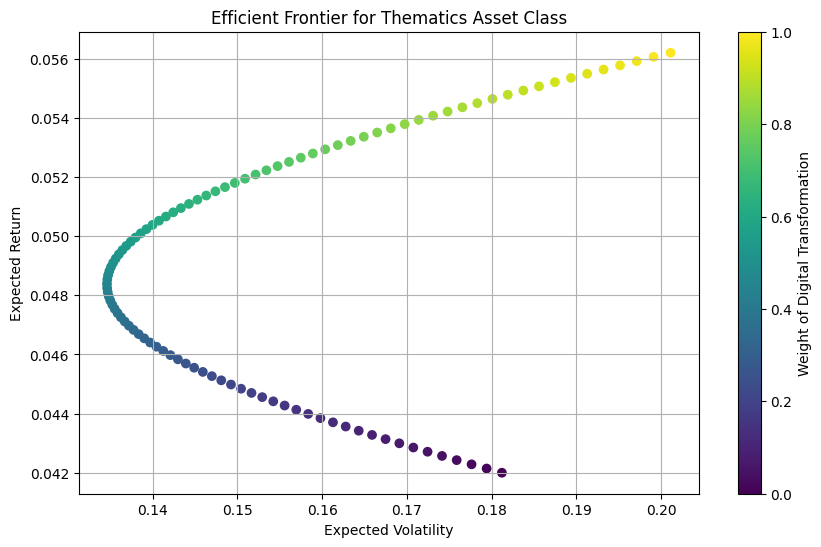

In [231]:
data = df[df["Asset Classes"] == "Thematics"]
data


# Define the range of weights for one asset
weights_digital_transformation = np.arange(0, 1.01, 0.01)

# Initialize lists to store portfolio metrics
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights_digital_transformation = []

# Calculate portfolio metrics for each weight combination
for weight_digital_transformation in weights_digital_transformation:
    weight_sustainable_future = 1 - weight_digital_transformation

    # Calculate portfolio expected return as a weighted average
    portfolio_return = (
        weight_digital_transformation * data["Expected Return"].values[0] +
        weight_sustainable_future * data["Expected Return"].values[1]
    )

    # Calculate portfolio expected volatility as a weighted average
    portfolio_volatility = np.sqrt(
        (weight_digital_transformation * data["Expected Volatility"].values[0]) ** 2 +
        (weight_sustainable_future * data["Expected Volatility"].values[1]) ** 2
    )

    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)
    portfolio_weights_digital_transformation.append(weight_digital_transformation)

# Create a DataFrame to store the results
portfolio_df = pd.DataFrame({
    "Weight (Digital Transformation)": portfolio_weights_digital_transformation,
    "Weight (Sustainable Future)": [1 - w for w in portfolio_weights_digital_transformation],
    "Expected Return": portfolio_returns,
    "Expected Volatility": portfolio_volatilities
})

# Identify portfolios on the efficient frontier (e.g., those with the minimum volatility)
efficient_frontier_df = portfolio_df[portfolio_df["Expected Volatility"] == min(portfolio_df["Expected Volatility"])]

# Display the table of portfolios on the efficient frontier
print(efficient_frontier_df)

# Plot the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatilities, portfolio_returns, c=portfolio_weights_digital_transformation, cmap='viridis', marker='o')
plt.colorbar(label='Weight of Digital Transformation')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier for Thematics Asset Class')
plt.grid(True)
plt.show()






## Get Allocation of Securities within Asset Class

In [341]:

def get_securities_allocation(data):
    # Define an objective function to minimize - Sharpe ratio in this case
    def calculate_portfolio_metrics(weights, expected_returns, expected_volatilities, risk_free_rate):
        portfolio_return = np.sum(weights * expected_returns)
        portfolio_volatility = np.sqrt(np.dot(weights, np.dot(np.diag(expected_volatilities), weights)))
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
        return -sharpe_ratio  # Minimize negative Sharpe ratio for optimization

    # Define optimization constraints (sum of weights should be 1)
    constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

    # Define optimization bounds (weights should be between 0 and 1)
    bounds = tuple((0, 1) for _ in range(len(data)))

    # Define risk-free rate (you can set this to your chosen rate)
    risk_free_rate = 0.04

    # Initialize weights for optimization
    initial_weights = np.array([1 / len(data)] * len(data))

    # Perform optimization to maximize Sharpe ratio
    result = minimize(calculate_portfolio_metrics, initial_weights, args=(
        np.array([security["Expected Return"] for i, security in data.iterrows()]),
        np.array([security["Expected Volatility"] for i,security in data.iterrows()]),
        risk_free_rate
    ), method='SLSQP', bounds=bounds, constraints=constraints)

    # Get optimized portfolio weights
    optimized_weights = result.x

    # Print the optimized weights
    for i, security in data.iterrows():
        print(f"{security['Security']}: {optimized_weights[i] * 100:.2f}%")

    # Print the maximum Sharpe ratio achieved
    print(f"Maximum Sharpe Ratio: {-result.fun:.4f}")

In [244]:

data_fixed_income = df[df["Asset Classes"] == "Fixed Income"]
data_fixed_income

get_securities_allocation(data_fixed_income)

Emerging Markets Local Currency Debt: 16.50%
Emerging Markets Sovereign Debt: 22.42%
U.S High Yield Corporate Bonds : 22.45%
Emerging Markets Corporate Bonds : 2.77%
U.S Inv Grade Corporate Bonds : 35.86%
Money Market Securities : 0.00%
Maximum Sharpe Ratio: 0.2125


## Efficient Frontier 

In [379]:
def get_table_portfolios(data, asset_class):

    # Extract expected returns and volatilities into arrays
    expected_returns = np.array([security["Expected Return"] for i,security in data.iterrows()])
    expected_volatilities = np.array([security["Expected Volatility"] for i, security in data.iterrows()])
    p_ret = [] # Define an empty array for portfolio returns
    p_vol = [] # Define an empty array for portfolio volatility
    p_weights = [] # Define an empty array for asset weights
    num_securities = len(expected_returns)
    print(num_securities)
    num_portfolios = 10000
    for portfolio in range(num_portfolios):
        weights = np.random.random(num_securities)
        # print(weights)?
        weights = weights/np.sum(weights)
        p_weights.append(weights)
        returns = np.dot(weights, expected_returns) # Returns are the product of individual expected returns of asset and its 
                                        # weights 
        p_ret.append(returns)
        volatility = np.sqrt(np.dot(weights ** 2, expected_volatilities ** 2 ))
        p_vol.append(volatility)
    
    results_data = {'Returns':p_ret, 'Volatility':p_vol}


    for i, security in data.iterrows():
        asset_name = security["Security"]
        weights_column_name = f"{asset_name} Weight"
        weights = [weights[i] for weights in p_weights]
        results_data[weights_column_name] = weights

    portfolios = pd.DataFrame(results_data)
    # portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])
    # plotting the minimum volatility portfolio
    # Plotting optimal portfolio

    # Show the subplots
    plt.show()
    return portfolios



## Fixed Income

In [385]:
fixed_income_table = get_table_portfolios(data_fixed_income, "Fixed Income")


6


### Min Risk Portfolio 

In [381]:

fixed_income_min_vol_port = fixed_income_table.iloc[fixed_income_table['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
fixed_income_min_vol_port


Returns                                        0.020085
Volatility                                     0.012367
Emerging Markets Local Currency Debt Weight    0.004099
Emerging Markets Sovereign Debt Weight         0.029318
U.S High Yield Corporate Bonds  Weight         0.037436
Emerging Markets Corporate Bonds  Weight       0.183698
U.S Inv Grade Corporate Bonds  Weight          0.056032
Money Market Securities  Weight                0.689418
Name: 7634, dtype: float64

### Optimal Portfolio

In [382]:
# Finding the optimal portfolio
rf = 0.04 # risk factor
fixed_income_optimal_risky_port = fixed_income_table.iloc[((fixed_income_table['Returns']-rf)/fixed_income_table['Volatility']).idxmax()]
fixed_income_optimal_risky_port

Returns                                        0.064889
Volatility                                     0.054012
Emerging Markets Local Currency Debt Weight    0.028013
Emerging Markets Sovereign Debt Weight         0.306588
U.S High Yield Corporate Bonds  Weight         0.228563
Emerging Markets Corporate Bonds  Weight       0.055897
U.S Inv Grade Corporate Bonds  Weight          0.373998
Money Market Securities  Weight                0.006941
Name: 1723, dtype: float64

In [383]:
def frontier_plot(min_port, optimal_port, port_table,asset_class):
    plt.subplots(figsize=(10, 10))
    plt.scatter(port_table['Volatility'], port_table['Returns'],marker='o', s=10, alpha=0.3)
    plt.scatter(min_port[1], min_port[0], color='r', marker='*', s=500)
    plt.scatter(optimal_port[1], optimal_port[0], color='g', marker='*', s=500)
    plt.title(asset_class + " Min and Opt Portfolio")
    plt.show()

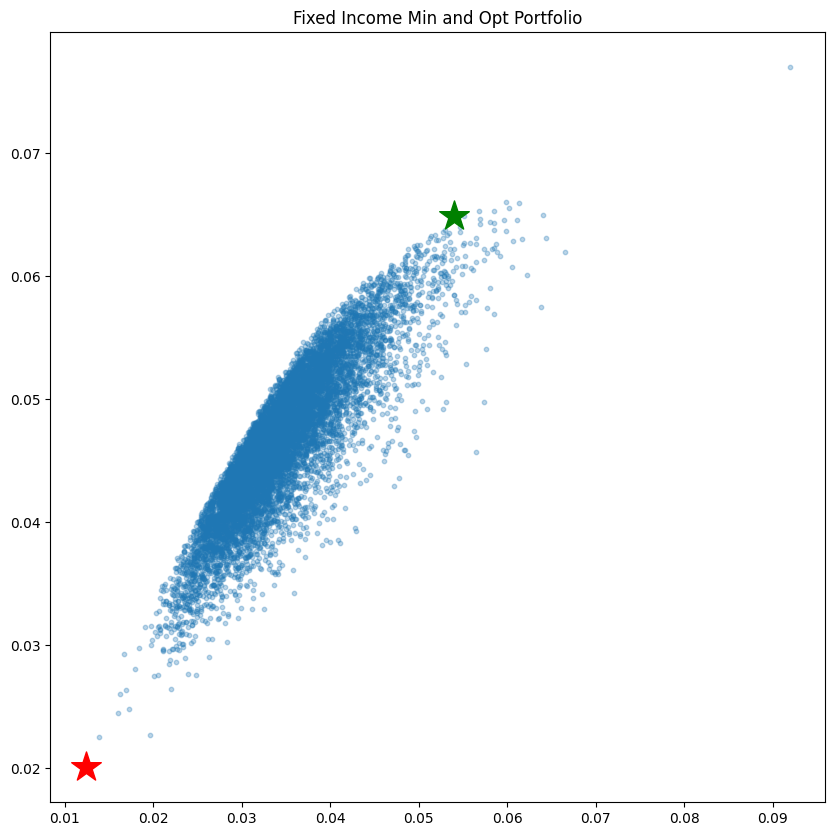

In [384]:
graph = frontier_plot(fixed_income_min_vol_port, fixed_income_optimal_risky_port, fixed_income_table, "Fixed Income")
graph

## Equities

In [386]:

data_equities = df[df["Asset Classes"] == "Equities"]
data_equities.reset_index(drop=True,inplace=True)
data_equities


,Asset Classes,Security,Expected Return,Expected Volatility,Sharpe Ratio
0,Equities,Japanese Equity,0.0886,0.2174,0.223551
1,Equities,U.S. Equity,0.0655,0.1470,0.173469
2,Equities,AC Asia ex-Japan Equity,0.0700,0.1941,0.154560


In [390]:
get_securities_allocation(data_equities)

Japanese Equity : 40.48%
U.S. Equity : 31.56%
AC Asia ex-Japan Equity : 27.96%
Maximum Sharpe Ratio: 0.1412


In [393]:
equity_table = get_table_portfolios(data_equities, "Equities")

3


In [394]:
equity_min_vol_port = equity_table.iloc[equity_table['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
equity_min_vol_port

Returns                            0.072051
Volatility                         0.103163
Japanese Equity  Weight            0.229570
U.S. Equity  Weight                0.493110
AC Asia ex-Japan Equity  Weight    0.277320
Name: 8245, dtype: float64

In [395]:
# Finding the optimal portfolio
rf = 0.04 # risk factor
equity_optimal_risky_port = equity_table.iloc[((equity_table['Returns']-rf)/equity_table['Volatility']).idxmax()]
equity_optimal_risky_port

Returns                            0.074564
Volatility                         0.107201
Japanese Equity  Weight            0.340661
U.S. Equity  Weight                0.393894
AC Asia ex-Japan Equity  Weight    0.265445
Name: 9112, dtype: float64

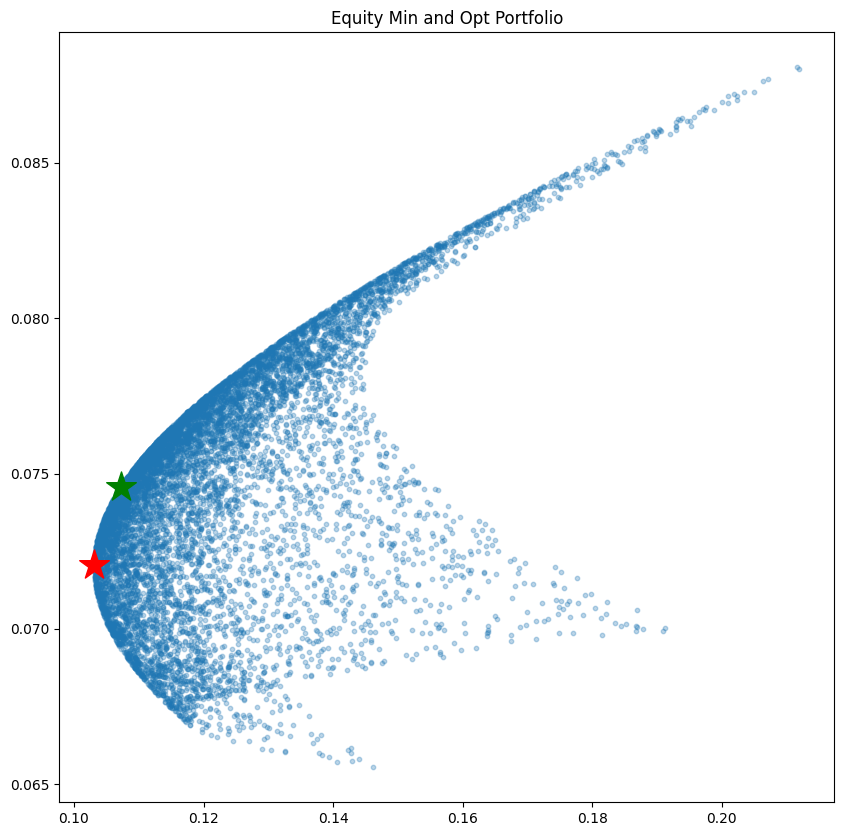

In [396]:
equity_graph = frontier_plot(equity_min_vol_port, equity_optimal_risky_port, equity_table, "Equity")
equity_graph


## Alternatives

In [397]:

data_alt = df[df["Asset Classes"] == "Alternatives"]
data_alt.reset_index(drop=True,inplace=True)
data_alt


,Asset Classes,Security,Expected Return,Expected Volatility,Sharpe Ratio
0,Alternatives,Real Estate Liquid Alternatives,0.0556,0.1707,0.091388
1,Alternatives,Equity Long Short Hedge Funds,0.0465,0.1684,0.038599
2,Alternatives,Multi-strategy Hedge Funds,0.0394,0.0424,-0.014151
3,Alternatives,Equity Market Neutral Liquid Alternatives,0.0373,0.1564,-0.017263
4,Alternatives,Global Macro Hedge Funds,0.0294,0.0456,-0.232456


In [398]:
get_securities_allocation(data_alt)

Real Estate Liquid Alternatives : 70.27%
Equity Long Short Hedge Funds: 29.73%
Multi-strategy Hedge Funds : 0.00%
Equity Market Neutral Liquid Alternatives : 0.00%
Global Macro Hedge Funds : 0.00%
Maximum Sharpe Ratio: 0.0409


In [402]:
alt_table = get_table_portfolios(data_alt,"Alternatives")


5


In [400]:
alt_min_vol_port = alt_table.iloc[alt_table['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
alt_min_vol_port

Returns                                              0.035677
Volatility                                           0.029697
Real Estate Liquid Alternatives  Weight              0.019576
Equity Long Short Hedge Funds Weight                 0.024773
Multi-strategy Hedge Funds  Weight                   0.516736
Equity Market Neutral Liquid Alternatives  Weight    0.021902
Global Macro Hedge Funds  Weight                     0.417012
Name: 440, dtype: float64

In [401]:
# Finding the optimal portfolio
rf = 0.04 # risk factor
alt_optimal_risky_port = alt_table.iloc[((alt_table['Returns']-rf)/alt_table['Volatility']).idxmax()]
alt_optimal_risky_port

Returns                                              0.051245
Volatility                                           0.117958
Real Estate Liquid Alternatives  Weight              0.670055
Equity Long Short Hedge Funds Weight                 0.165124
Multi-strategy Hedge Funds  Weight                   0.117388
Equity Market Neutral Liquid Alternatives  Weight    0.036928
Global Macro Hedge Funds  Weight                     0.010504
Name: 6372, dtype: float64

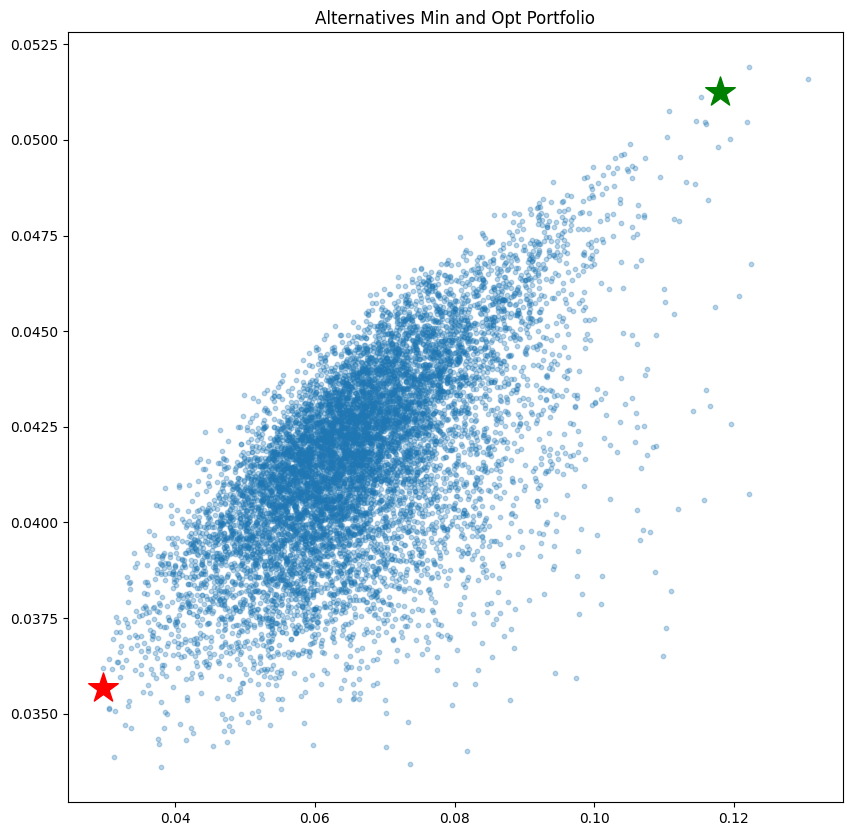

In [403]:
alt_graph = frontier_plot(alt_min_vol_port, alt_optimal_risky_port, alt_table, "Alternatives")


## Thematics

In [406]:
data_thematics = df[df["Asset Classes"] == "Thematics"]
data_thematics.reset_index(drop=True,inplace=True)


get_securities_allocation(data_thematics)

Investing in a Sustainable Future (ESG): 87.90%
Digital Transformation: 12.10%
Maximum Sharpe Ratio: 0.0364


In [408]:
them_table = get_table_portfolios(data_thematics, "Thematics")



2


In [409]:
them_min_vol_port = them_table.iloc[them_table['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
them_min_vol_port


Returns                                           0.048363
Volatility                                        0.134615
Investing in a Sustainable Future (ESG) Weight    0.448092
Digital Transformation Weight                     0.551908
Name: 8639, dtype: float64

In [410]:
# Finding the optimal portfolio
rf = 0.04 # risk factor
them_optimal_risky_port = them_table.iloc[((them_table['Returns']-rf)/them_table['Volatility']).idxmax()]
them_optimal_risky_port

Returns                                           0.054320
Volatility                                        0.176115
Investing in a Sustainable Future (ESG) Weight    0.867593
Digital Transformation Weight                     0.132407
Name: 8746, dtype: float64

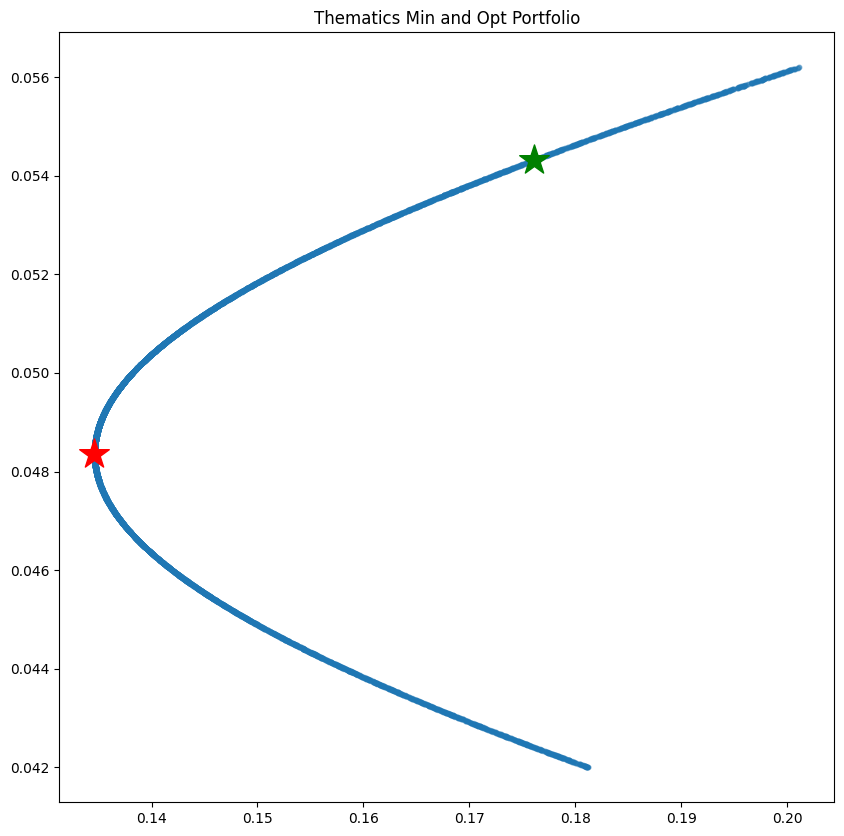

In [411]:
them_graph = frontier_plot(them_min_vol_port, them_optimal_risky_port, them_table, "Thematics")
